<a href="https://colab.research.google.com/github/Mehul-Agrawal410/SOS_2023/blob/main/CatDogClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from matplotlib import pyplot as plt

In [2]:
classNames = ['cat', 'dog']
split = ['train[:70%]', 'train[70%:]']
HEIGHT = 200
WIDTH = 200
trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete6NK7NH/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


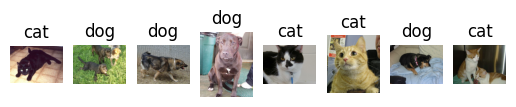

In [3]:
i = 0
fig, ax = plt.subplots(1, 8)
for image, label in testDataset.take(8):
    ax[i].axis('off')
    ax[i].set_title(classNames[label])
    ax[i].imshow(image)
    i += 1

plt.show()

In [4]:
def preprocess(img, label):
    return tf.image.resize(img, [HEIGHT, WIDTH]) / 255, label

trainDataset = trainDataset.map(preprocess).batch(32)
testDataset = testDataset.map(preprocess).batch(32)

In [33]:
def create_model():
    model = keras.Sequential([
      keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(HEIGHT, WIDTH, 3)),
      keras.layers.MaxPooling2D((2, 2)),
      keras.layers.Dropout(0.2),
      keras.layers.Conv2D(32, (3, 3), activation='relu'),
      keras.layers.MaxPooling2D((2, 2)),
      keras.layers.Dropout(0.2),
      keras.layers.Conv2D(64, (3, 3), activation='relu'),
      keras.layers.MaxPooling2D((2, 2)),
      keras.layers.Flatten(),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(512, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


checkpoint_filepath = '/tmp/checkpoint'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

model = create_model()

In [18]:
trainHistory = model.fit(trainDataset, epochs=10, validation_data=testDataset, callbacks = [checkpoint])

Epoch 1/10
509/509 [==============================] - 43s 81ms/step - loss: 0.6718 - accuracy: 0.6076 - val_loss: 0.6190 - val_accuracy: 0.7047
Epoch 2/10
509/509 [==============================] - 40s 79ms/step - loss: 0.5447 - accuracy: 0.7206 - val_loss: 0.5379 - val_accuracy: 0.7445
Epoch 3/10
509/509 [==============================] - 39s 77ms/step - loss: 0.4879 - accuracy: 0.7631 - val_loss: 0.4911 - val_accuracy: 0.7713
Epoch 4/10
509/509 [==============================] - 38s 75ms/step - loss: 0.4312 - accuracy: 0.8001 - val_loss: 0.4570 - val_accuracy: 0.7839
Epoch 5/10
509/509 [==============================] - 39s 76ms/step - loss: 0.3660 - accuracy: 0.8357 - val_loss: 0.4599 - val_accuracy: 0.7912
Epoch 6/10
509/509 [==============================] - 37s 72ms/step - loss: 0.2977 - accuracy: 0.8703 - val_loss: 0.5390 - val_accuracy: 0.7775
Epoch 7/10
509/509 [==============================] - 37s 73ms/step - loss: 0.2434 - accuracy: 0.8973 - val_loss: 0.5442 - val_accuracy:

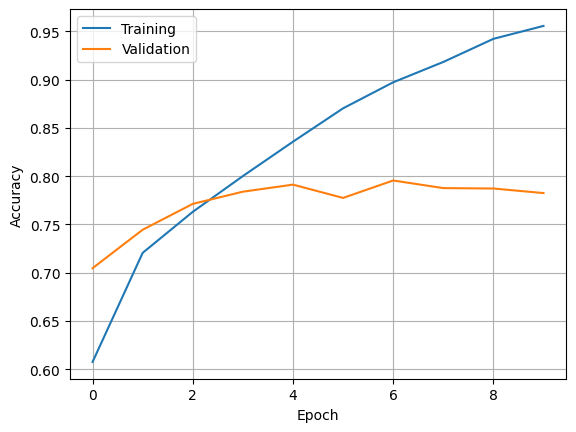

In [19]:
plt.plot(trainHistory.history['accuracy'])
plt.plot(trainHistory.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()

In [34]:
model_best = create_model()

model_best.load_weights('/tmp/checkpoint')

In [35]:
(loss, accuracy) = model_best.evaluate(testDataset)
print(loss)
print(accuracy)

219/219 [==============================] - 10s 46ms/step - loss: 0.5442 - accuracy: 0.7955
0.5442296266555786
0.7955294251441956


In [48]:
predictions = model_best.predict(testDataset.skip(8).take(8))

8/8 [==============================] - 1s 39ms/step


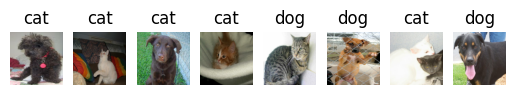

In [49]:
i = 0
fig, ax = plt.subplots(1, 8)
for image, _ in testDataset.skip(8).take(8):
    predictedLabel = int(predictions[i] >= 0.5)
    # print(predictedLabel)
    ax[i].axis('off')
    ax[i].set_title(classNames[predictedLabel])
    ax[i].imshow(image[0])
    i += 1

plt.show()